In [1]:

import datetime

import copy

import random



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')
# plt.style.use(['dark_background', 'ggplot'])

import seaborn as sns
# sns.set()

# import scipy
# import scipy.stats as stats


# # sympy = symbolic math in Python
# import sympy as sym
# import sympy.plotting.plot as symplot


# make the equations look nicer

# from IPython.display import display
# display.set_matplotlib_formats('svg') # Deprecated since version 7.23

# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:

import sklearn


# from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# # Modelling
# from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# from sklearn.model_selection import GridSearchCV










In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

from torch.nn.utils.rnn import pad_sequence




torch.__version__

'1.10.2'

In [5]:
import torchvision
import torchvision.transforms as T



torchvision.__version__

'0.11.3'

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# date = np.datetime64("2000-01-01")
# date_strings = date.astype(str).split('-'). 
# # >> ['2000', '01', '01']

# year_int = int(date_strings[0])

In [9]:
# !wget -nc https://github.com/Proteinea/dl-challenge-2/blob/main/data/data.txt
# !wget -nc https://raw.githubusercontent.com/Proteinea/dl-challenge-2/main/data/data.txt

In [10]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


'text.txt'

[ 1-1-1800 to 31-12-2200 ]

[day condition] [month condition] [leap year condition] [decade condition] date

[MON] [DEC] [False] [196] 3-12-1962
[THU] [DEC] [True] [204] 3-12-2048
[WED] [JAN] [False] [181] 10-1-1810

In [12]:
# data = np.loadtxt(open('text.txt','r'),delimiter=' ')
ori = pd.read_csv('./data/data.txt', sep=' ', header=None)

# ori = pd.read_csv('data.txt', sep=' ', header=None)


In [13]:
ori.columns = ['day', 'month', 'leap_year', 'decade', 'date']

In [14]:
ori

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [15]:
# data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)
# # pd.to_datetime(data.date, infer_datetime_format=False)

In [16]:
ori.dtypes

day          object
month        object
leap_year    object
decade       object
date         object
dtype: object

In [17]:
# data_backup = copy.deepcopy(ori)
data = copy.deepcopy(ori)

In [18]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [19]:
data.date

0           1-1-1800
1           1-1-1801
2           1-1-1802
3           1-1-1803
4           1-1-1804
             ...    
146457    31-12-2196
146458    31-12-2197
146459    31-12-2198
146460    31-12-2199
146461    31-12-2200
Name: date, Length: 146462, dtype: object

In [20]:
# # data['date'] = pd.date_range('3-12-2048', periods=10)
# # data['date'] = pd.date_range('12-3-1962', periods=10)

# # 1-1-1800 to 31-12-2200
# data['date'] = pd.date_range(start='1-1-1800',end='12-31-2200')


data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)

# # data.date = data.date.dt.strftime('%d-%m-%Y')
# # data.date = pd.to_datetime(data.date.dt.strftime('%d-%m-%Y'), format='%d-%m-%Y', infer_datetime_format=False)



In [21]:
data.dtypes

day                  object
month                object
leap_year            object
decade               object
date         datetime64[ns]
dtype: object

In [22]:
data.date[0]

Timestamp('1800-01-01 00:00:00')

In [23]:
data.date[0].day_of_week

2

In [24]:
data.date[0].day_name()

'Wednesday'

In [25]:
data.date[0].month_name()

'January'

In [26]:
data.date[0].is_leap_year

False

In [27]:
# print(data.date_period[0].day)
# print(data.date_period[0].month)
print(data.date[0].year)

1800


In [28]:
data.date[0].year // 10

180

In [29]:
# for i in range(len(data)):

#     day_str = str(data.date.iloc[i].day_name()[:3].upper())
#     data.day.loc[i] = str(f'[{day_str}]')

#     month_str = str(data.date.iloc[i].month_name()[:3].upper())
#     data.month.loc[i] = str(f'[{month_str}]')

#     leap_str = str(data.date.iloc[i].is_leap_year)
#     data.leap_year.loc[i] = str(f'[{leap_str}]')


#     decade_str = str(data.date.iloc[i].year // 10)
#     data.decade.loc[i] = str(f'[{decade_str}]')
    
    

# data.date = data.date.dt.strftime('%d-%m-%Y')
# data.to_csv('test.txt', sep=' ', header=None, index=False)

In [30]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1800-01-01
1,[THU],[JAN],[False],[180],1801-01-01
2,[FRI],[JAN],[False],[180],1802-01-01
3,[SAT],[JAN],[False],[180],1803-01-01
4,[SUN],[JAN],[True],[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],2196-12-31
146458,[SUN],[DEC],[False],[219],2197-12-31
146459,[MON],[DEC],[False],[219],2198-12-31
146460,[TUE],[DEC],[False],[219],2199-12-31


In [31]:
data.leap_year = data.leap_year.map({'[False]': float(0),
                                     '[True]' : float(1)})

# data.leap_year = data.leap_year.astype(np.float64)

In [32]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],0.0,[180],1800-01-01
1,[THU],[JAN],0.0,[180],1801-01-01
2,[FRI],[JAN],0.0,[180],1802-01-01
3,[SAT],[JAN],0.0,[180],1803-01-01
4,[SUN],[JAN],1.0,[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],1.0,[219],2196-12-31
146458,[SUN],[DEC],0.0,[219],2197-12-31
146459,[MON],[DEC],0.0,[219],2198-12-31
146460,[TUE],[DEC],0.0,[219],2199-12-31


date -> timestamp

In [131]:
data.date.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [34]:
data.date.iloc[0].timestamp()

-5364662400.0

In [35]:
# np.log(data.date.iloc[0].timestamp())

In [36]:
# data['date_timestamp'] = data.date.apply(lambda dt: dt.timestamp())
data['date_timestamp'] = data.date.apply(lambda dt: dt.timestamp())

In [37]:
data

,day,month,leap_year,decade,date,date_timestamp
0,[WED],[JAN],0.0,[180],1800-01-01,-5.364662e+09
1,[THU],[JAN],0.0,[180],1801-01-01,-5.333126e+09
2,[FRI],[JAN],0.0,[180],1802-01-01,-5.301590e+09
3,[SAT],[JAN],0.0,[180],1803-01-01,-5.270054e+09
4,[SUN],[JAN],1.0,[180],1804-01-01,-5.238518e+09
...,...,...,...,...,...,...
146457,[SAT],[DEC],1.0,[219],2196-12-31,7.163424e+09
146458,[SUN],[DEC],0.0,[219],2197-12-31,7.194960e+09
146459,[MON],[DEC],0.0,[219],2198-12-31,7.226496e+09
146460,[TUE],[DEC],0.0,[219],2199-12-31,7.258032e+09


In [38]:
x = data.decade.iloc[0]
x

'[180]'

In [39]:
x.strip('[]')

'180'

In [40]:
data.decade = data.decade.apply(lambda x: x.strip('[]')).astype('int64')

In [41]:
data.day = data.day.apply(lambda x: x.strip('[]'))
data.month = data.month.apply(lambda x: x.strip('[]'))

In [42]:
data

,day,month,leap_year,decade,date,date_timestamp
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09
...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09


In [43]:
data.dtypes

day                       object
month                     object
leap_year                float64
decade                     int64
date              datetime64[ns]
date_timestamp           float64
dtype: object

In [44]:
# data['day_of_week_sin'] = np.sin(data['day'] * (2 * np.pi / 7))
# data['day_of_week_cos'] = np.cos(data['day'] * (2 * np.pi / 7))

In [45]:
# data['month_of_year_sin'] = np.sin(data['month'] * (2 * np.pi / 12))
# data['month_of_year_cos'] = np.cos(data['month'] * (2 * np.pi / 12))

In [46]:
data.day.astype("category").cat.codes

0         6
1         4
2         0
3         2
4         3
         ..
146457    2
146458    3
146459    1
146460    5
146461    6
Length: 146462, dtype: int8

In [47]:
data.day.astype("category").cat.categories

Index(['FRI', 'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED'], dtype='object')

In [48]:
data.day.astype("category").cat.as_ordered()

0         WED
1         THU
2         FRI
3         SAT
4         SUN
         ... 
146457    SAT
146458    SUN
146459    MON
146460    TUE
146461    WED
Name: day, Length: 146462, dtype: category
Categories (7, object): ['FRI' < 'MON' < 'SAT' < 'SUN' < 'THU' < 'TUE' < 'WED']

In [49]:
data.day.astype("category").cat.codes

0         6
1         4
2         0
3         2
4         3
         ..
146457    2
146458    3
146459    1
146460    5
146461    6
Length: 146462, dtype: int8

In [50]:
# c = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'], ordered=True,
#                    categories=['c', 'b', 'a'])

In [51]:
day_code = pd.Categorical(data.day, ordered=True,
                   categories=['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI'])

In [52]:
['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI']

['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI']

In [53]:
data['day_code'] = day_code.codes

In [54]:
for i,c in enumerate(day_code.categories):
    print(i,c)

0 SAT
1 SUN
2 MON
3 TUE
4 WED
5 THU
6 FRI


In [55]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1
...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3


In [56]:
data['day_sin'] = np.sin(data['day_code'] * (2 * np.pi / 7))
data['day_cos'] = np.cos(data['day_code'] * (2 * np.pi / 7))

In [57]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969


In [58]:
month_code = pd.Categorical(data.month, ordered=True,
                   categories=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

In [59]:
data.month.astype("category").cat.categories

Index(['APR', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV',
       'OCT', 'SEP'],
      dtype='object')

In [60]:
['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

['JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC']

In [61]:
data['month_code'] = month_code.codes

In [62]:
for i,m in enumerate(month_code.categories):
    print(i,m)

0 JAN
1 FEB
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


In [63]:
data['month_sin'] = np.sin(data['month_code'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month_code'] * (2 * np.pi / 12))

In [64]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025


In [65]:
# alpha = len(data.decade.unique())
alpha = (data.decade.iloc[-1] - data.decade.iloc[0]) + 1

data['decade_sin'] = np.sin(data['decade'] * (2 * np.pi / alpha))
data['decade_cos'] = np.cos(data['decade'] * (2 * np.pi / alpha))

In [66]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568


In [67]:
data.dtypes

day                       object
month                     object
leap_year                float64
decade                     int64
date              datetime64[ns]
date_timestamp           float64
day_code                    int8
day_sin                  float64
day_cos                  float64
month_code                  int8
month_sin                float64
month_cos                float64
decade_sin               float64
decade_cos               float64
dtype: object

In [68]:
data.day_sin.min(), data.day_sin.max()

(-0.9749279121818236, 0.9749279121818236)

In [69]:
data.day_cos.min(), data.day_cos.max()

(-0.9009688679024191, 1.0)

In [70]:
data.month_sin.min(), data.month_sin.max()

(-1.0, 1.0)

In [71]:
data.month_cos.min(), data.month_cos.max()

(-1.0, 1.0)

In [72]:
data.leap_year.min(), data.leap_year.max()

(0.0, 1.0)

In [73]:
data.decade_sin.min(), data.decade_sin.max()

(-0.9992661810508099, 0.9992661810508101)

In [74]:
data.decade_cos.min(), data.decade_cos.max()

(-0.9970658011837407, 1.0)

In [75]:
data.date_timestamp.min(), data.date_timestamp.max()

(-5364662400.0, 7289568000.0)

In [76]:
data.date_timestamp.min() / data.date_timestamp.max(), data.date_timestamp.max() / data.date_timestamp.max()

(-0.7359369444115207, 1.0)

In [78]:
data.date_timestamp.shape

(146462,)

In [79]:
date_timestamp = data.date_timestamp.values.reshape(-1, 1)
# decade         = data.decade.values.reshape(-1, 1)

In [80]:
date_timestamp.shape

(146462, 1)

In [81]:
date_timestamp

array([[-5.3646624e+09],
       [-5.3331264e+09],
       [-5.3015904e+09],
       ...,
       [ 7.2264960e+09],
       [ 7.2580320e+09],
       [ 7.2895680e+09]])

In [82]:
# decade

In [83]:
# decade_scaler         = RobustScaler()
date_timestamp_scaler = RobustScaler()


# decade_scaled         = decade_scaler.fit_transform(decade)
date_timestamp_scaled = date_timestamp_scaler.fit_transform(date_timestamp)


In [84]:
# np.apply_over_axes(np.mean,X_scaled,0), np.apply_over_axes(np.var,X_scaled,0)

In [85]:
# np.apply_over_axes(np.median,X_scaled,0)

In [86]:
# X.min(), X.max()

In [87]:
# X_scaled.min(), X_scaled.max()

In [88]:
# decade.min(), decade.max()

In [89]:
# decade_scaled.min(), decade_scaled.max()

In [90]:
date_timestamp.min(), date_timestamp.max()

(-5364662400.0, 7289568000.0)

In [91]:
date_timestamp_scaled.min(), date_timestamp_scaled.max()

(-1.0, 1.0)

In [92]:
# data['decade_scaled']         = decade_scaled
data['date_timestamp_scaled'] = date_timestamp_scaled

In [93]:
# test = np.array([0.95]).reshape(-1, 1)
# test

In [94]:
# scaler.inverse_transform(test)

In [95]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568,0.995016


<AxesSubplot:>

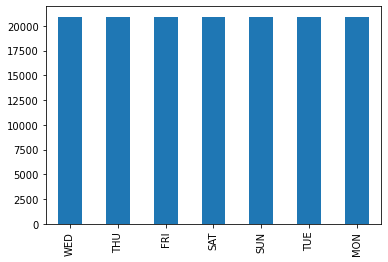

In [96]:
data.day.value_counts().plot(kind="bar")

<AxesSubplot:>

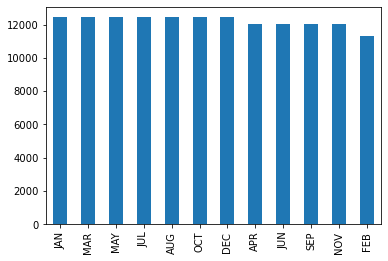

In [97]:
data.month.value_counts().plot(kind="bar")

<AxesSubplot:>

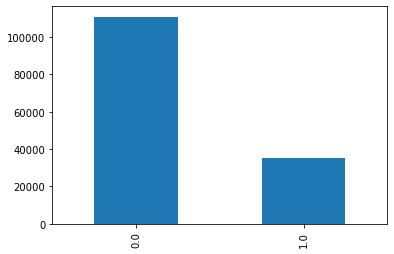

In [98]:
data.leap_year.value_counts().plot(kind="bar")

<AxesSubplot:>

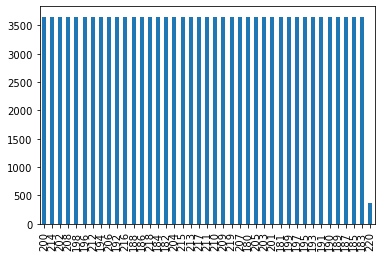

In [99]:
data.decade.value_counts().plot(kind="bar")

In [100]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568,0.995016


['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']
['date_timestamp_scaled']

In [101]:
# fig,ax = plt.subplots(1,figsize=(17,4))
# ax = sns.boxplot(data=data[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [102]:
# fig,ax = plt.subplots(1,figsize=(17,4))
# ax = sns.boxplot(data=data[['leap_year']])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [103]:
X = data[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_sin', 'decade_cos']].values
X

array([[-0.43388374, -0.90096887,  0.        , ...,  0.        ,
         0.63624244, -0.77148918],
       [-0.97492791, -0.22252093,  0.        , ...,  0.        ,
         0.63624244, -0.77148918],
       [-0.78183148,  0.6234898 ,  0.        , ...,  0.        ,
         0.63624244, -0.77148918],
       ...,
       [ 0.97492791, -0.22252093, -0.5       , ...,  0.        ,
         0.83936543, -0.54356755],
       [ 0.43388374, -0.90096887, -0.5       , ...,  0.        ,
         0.83936543, -0.54356755],
       [-0.43388374, -0.90096887, -0.5       , ...,  0.        ,
         0.74655322, -0.6653257 ]])

In [104]:
len(X)

146462

In [105]:
Y = data['date_timestamp_scaled'].values.reshape(-1, 1)
Y

array([[-1.        ],
       [-0.99501574],
       [-0.99003148],
       ...,
       [ 0.99003148],
       [ 0.99501574],
       [ 1.        ]])

In [106]:
len(Y)

146462

In [107]:
# # leap = np.where(~X['leap_year'] == 1)[0]
# leap = np.where(X['leap_year'] == 1)[0]

# leap

In [108]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [109]:
train_dataT = TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))

test_dataT  = TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))



batchsize = 32

train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [110]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (146462, 7)

Y: (146462, 1)

Train data:   (102523, 7)

Train labels: (102523, 1)

Test data:    (43939, 7)

Test labels:  (43939, 1)


In [111]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(7, 32)

        self.fc1 = nn.Linear(32, 128)
        self.bnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 512)
        self.bnorm2 = nn.BatchNorm1d(512)

        self.fc3 = nn.Linear(512, 64)
        self.bnorm3 = nn.BatchNorm1d(64)

        self.fc4 = nn.Linear(64, 10)
        self.bnorm4 = nn.BatchNorm1d(10)


        self.output = nn.Linear(10, 1)



    def forward(self, x):

        x = F.leaky_relu( self.input(x) )

        x = F.leaky_relu(self.bnorm1(self.fc1(x)))
        x = F.dropout(x, p=0.5, training=self.training)

        x = F.leaky_relu(self.bnorm2(self.fc2(x)))
        x = F.dropout(x, p=0.5, training=self.training)

        x = F.leaky_relu(self.bnorm3(self.fc3(x)))
        x = F.dropout(x, p=0.5, training=self.training)


        x = F.leaky_relu(self.bnorm4(self.fc4(x)))
        x = F.dropout(x, p=0.5, training=self.training)


        x = torch.tanh(self.output(x))

        return x
        


In [112]:
test_x, test_y = next(iter(train_loader))

print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')



X: (146462, 7)

Y: (146462, 1)



In [113]:
model = Model().to(device)

# test_hat = model(torch.randn(32,6))
test_hat = model(test_x)

print(test_hat.shape)

torch.Size([32, 1])


In [114]:
# for p in list(model.named_parameters()):
#     if 'weight' in p[0] and 'bnorm' not in p[0]:
#         nn.init.xavier_normal_(p[1].data)
#         print(p[0])
#         print(p[1].data.shape)

In [115]:
lossfun = nn.MSELoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.5, 0.999), weight_decay=1e-1)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=1e-9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=0.1)




In [116]:
numepochs = 1

trainLoss = torch.zeros(numepochs)
testLoss   = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc    = torch.zeros(numepochs)


for epochi in range(numepochs):
    
    model.train() # switch to train mode

    batchLoss = []
    batchAcc  = []

    for X,y in train_loader:

        X = X.to(device)
        y = y.to(device)

        yHat = model(X)
        loss = lossfun(yHat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batchLoss.append(loss.item())
        batchAcc.append( torch.mean(( yHat == y).float() ).item() )
        
        
    
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi]  = 100*np.mean(batchAcc)


    
    model.eval() # switch to test mode
    
    XX,yy = next(iter(test_loader))

    XX = XX.to(device)
    yy = yy.to(device)

    # forward pass and loss
    with torch.no_grad():
        yHat_test = model(XX)
        loss = lossfun(yHat_test, yy)


    testLoss[epochi] = loss.item()
    testAcc[epochi]  = 100*torch.mean( (yHat_test == yy).float() ).item()

    # if (epochi + 1) % 5 == 0:
    print(f'Epoch {epochi+1}/{numepochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():0.4f}')



trainLoss, testLoss, trainAcc, testAcc

Epoch 1/1, Train Loss: 0.0372, Test Loss: 0.0372


(tensor([0.1542]), tensor([0.0372]), tensor([0.]), tensor([0.]))

In [117]:
yHat.shape, y.shape

(torch.Size([32, 1]), torch.Size([32, 1]))

In [118]:
yHat_test.shape, yy.shape

(torch.Size([1, 1]), torch.Size([1, 1]))

In [119]:
yHat.flatten(), y.flatten()

(tensor([ 0.3727,  0.4567,  0.3598,  0.3118, -0.7258, -0.0781, -0.9164,  0.3110,
         -0.0837, -0.4102,  0.3932,  0.1563,  0.4579,  0.8579, -0.0911, -0.8486,
         -0.1543,  0.6788,  0.9023,  0.5033, -0.0835, -0.3757, -0.0861, -0.8968,
         -0.0860, -0.0854,  0.5224, -0.1944, -0.0860, -0.0753, -0.0877,  0.2731],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([ 0.9213,  0.4422,  0.2880,  0.7082,  0.9481, -0.2169, -0.9890,  0.4658,
         -0.1774, -0.4788,  0.8186,  0.9359,  0.4277,  0.4367, -0.4935, -0.9666,
         -0.3445,  0.7509,  0.7994,  0.4863, -0.1029, -0.4038, -0.9918, -0.9944,
         -0.5291, -0.5503,  0.6238, -0.2900,  0.0055,  0.6300, -0.7275,  0.1990]))

In [120]:
yHat_test.flatten(), yy.flatten()

(tensor([-0.7253]), tensor([-0.9181]))

In [278]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_sin,decade_cos,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,0.636242,-0.771489,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,0.636242,-0.771489,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,0.636242,-0.771489,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,0.636242,-0.771489,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.839365,-0.543568,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.839365,-0.543568,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.839365,-0.543568,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.839365,-0.543568,0.995016


In [274]:
c = pd.to_datetime(data.date)
c

0        1800-01-01
1        1801-01-01
2        1802-01-01
3        1803-01-01
4        1804-01-01
            ...    
146457   2196-12-31
146458   2197-12-31
146459   2198-12-31
146460   2199-12-31
146461   2200-12-31
Name: date, Length: 146462, dtype: datetime64[ns]

In [275]:
c.dt.quarter

0         1
1         1
2         1
3         1
4         1
         ..
146457    4
146458    4
146459    4
146460    4
146461    4
Name: date, Length: 146462, dtype: int64

In [276]:
len(c.dt.quarter.unique())

4

In [293]:
c.dt.dayofyear

0           1
1           1
2           1
3           1
4           1
         ... 
146457    366
146458    365
146459    365
146460    365
146461    365
Name: date, Length: 146462, dtype: int64

In [280]:
len(c.dt.dayofyear.unique())

366

In [294]:
# c.dt.week.head()
c.dt.isocalendar().week

0          1
1          1
2         53
3         52
4         52
          ..
146457    52
146458    52
146459     1
146460     1
146461     1
Name: week, Length: 146462, dtype: UInt32

In [284]:
c.dt.year.head()

0    1800
1    1801
2    1802
3    1803
4    1804
Name: date, dtype: int64

In [285]:
len(c.dt.year.unique())

401

In [176]:
c.dt.isocalendar()

,year,week,day
0,1800,1,3
1,1801,1,4
2,1801,53,5
3,1802,52,6
4,1803,52,7
...,...,...,...
146457,2196,52,6
146458,2197,52,7
146459,2199,1,1
146460,2200,1,2


In [177]:
c.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [186]:
len(c.unique())

146462

In [295]:
c.dt.date.unique()

array([datetime.date(1800, 1, 1), datetime.date(1801, 1, 1),
       datetime.date(1802, 1, 1), ..., datetime.date(2198, 12, 31),
       datetime.date(2199, 12, 31), datetime.date(2200, 12, 31)],
      dtype=object)

In [300]:
c.dt.is_year_start

0          True
1          True
2          True
3          True
4          True
          ...  
146457    False
146458    False
146459    False
146460    False
146461    False
Name: date, Length: 146462, dtype: bool

In [303]:
c.dt.is_month_start

0          True
1          True
2          True
3          True
4          True
          ...  
146457    False
146458    False
146459    False
146460    False
146461    False
Name: date, Length: 146462, dtype: bool

In [304]:
c.dt.is_quarter_start

0          True
1          True
2          True
3          True
4          True
          ...  
146457    False
146458    False
146459    False
146460    False
146461    False
Name: date, Length: 146462, dtype: bool

In [189]:
c

0        1800-01-01
1        1801-01-01
2        1802-01-01
3        1803-01-01
4        1804-01-01
            ...    
146457   2196-12-31
146458   2197-12-31
146459   2198-12-31
146460   2199-12-31
146461   2200-12-31
Name: date, Length: 146462, dtype: datetime64[ns]

In [342]:
x = c.dt.strftime("%Y%m%d")
x = x.astype(np.int64).values.reshape(-1, 1)

x

array([[18000101],
       [18010101],
       [18020101],
       ...,
       [21981231],
       [21991231],
       [22001231]], dtype=int64)

In [271]:
datetime.datetime.strptime('18000101', "%Y%m%d")

datetime.datetime(1800, 1, 1, 0, 0)

In [324]:
ss = RobustScaler()

In [325]:
out = ss.fit_transform(x)

In [326]:
out

array([[-1.00000975],
       [-0.9950112 ],
       [-0.99001265],
       ...,
       [ 0.98997716],
       [ 0.99497571],
       [ 0.99997426]])

In [327]:
prev = ss.inverse_transform([[-0.99001265]]).round()
prev

array([[18020101.]])

In [328]:
prev

array([[18020101.]])

In [343]:
ss = StandardScaler()

In [344]:
out = ss.fit_transform(x)

In [345]:
out

array([[-1.72823815],
       [-1.71959941],
       [-1.71096067],
       ...,
       [ 1.71095716],
       [ 1.7195959 ],
       [ 1.72823464]])

In [346]:
prev = ss.inverse_transform([[-1.71096067]]).round()
prev

array([[18020101.]])

In [347]:
prev

array([[18020101.]])

In [334]:
ss = MinMaxScaler()

In [335]:
out = ss.fit_transform(x)

In [336]:
out

array([[0.        ],
       [0.00249929],
       [0.00499859],
       ...,
       [0.99500141],
       [0.99750071],
       [1.        ]])

In [337]:
prev = ss.inverse_transform([[0.00499859]]).round()
prev

array([[18020101.]])

In [338]:
prev

array([[18020101.]])

0        1800-01-01
1        1801-01-01
2        1802-01-01
3        1803-01-01
4        1804-01-01
            ...    
146457   2196-12-31
146458   2197-12-31
146459   2198-12-31
146460   2199-12-31
146461   2200-12-31
Name: date, Length: 146462, dtype: datetime64[ns]

In [349]:
x

array([[18000101],
       [18010101],
       [18020101],
       ...,
       [21981231],
       [21991231],
       [22001231]], dtype=int64)

In [351]:
x.min(), x.max()

(18000101, 22001231)

In [392]:
(x.min() / x.max()), (x.max() / x.max())

(0.8181406304038169, 1.0)

In [378]:
18000101 / x.max()

0.8181406304038169

In [379]:
18010101 / x.max()

0.8185951504259011

In [381]:
18020101 / x.max()

0.8190496704479854

In [383]:
0.8181406304038169 * x.max()

18000101.0

In [388]:
(0.8190 * x.max()).round()

18019008.0

In [391]:
k = c.dt.strftime("%Y%m%d")
k = x.astype(np.int64)

k

array([[18000101],
       [18010101],
       [18020101],
       ...,
       [21981231],
       [21991231],
       [22001231]], dtype=int64)

In [368]:
xx = np.array([18000101])
# xx = np.array([21971231])

In [369]:
l = np.log(xx)
# l = np.array([16.7059])

l

array([16.70588793])

In [370]:
np.exp(l).round()

array([18000101.])

In [371]:
np.exp(l).round() == xx

array([ True])

In [372]:
np.log10(xx)

array([7.25527494])

In [373]:
np.log10([18010101])

array([7.25551615])

In [256]:
pd.to_datetime('1970-01-01').value

0

In [393]:
import pathlib


In [394]:
output_path = './data/example_input.txt'

In [395]:
p = pathlib.Path(output_path)
p

WindowsPath('data/example_input.txt')

In [396]:
p.stem + '_smote'

'example_input_smote'

In [404]:
s = str(p)
s

'data\\example_input.txt'

In [405]:
s.replace(p.stem, p.stem + '_smote')

'data\\example_input_smote.txt'

In [406]:
output_path = '../data/example_input.txt'


p = pathlib.Path(output_path)

output_path_smote = output_path.replace(p.stem, p.stem + '_smote')

In [407]:
output_path, output_path_smote

('../data/example_input.txt', '../data/example_input_smote.txt')

In [ ]:
# pd.read_csv(p.absolute(), sep=' ', header=None)
# pd.read_csv(p.absolute())